In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
dt = pd.read_csv("C:/Users/Shreesai/Desktop/DATA SCIENCE/datasets/ToyotaCorolla - MLR.csv")  

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
dt.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
dt=dt.rename({'Age_08_04':'Age','cc':'CC',},axis=1)
dt

,Price,Age,KM,Fuel_Type,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   CC         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [7]:
dt.drop_duplicates().reset_index(drop= True)

,Price,Age,KM,Fuel_Type,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [8]:
dt = dt.drop('Fuel_Type', axis=1)

In [9]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age        1436 non-null   int64
 2   KM         1436 non-null   int64
 3   HP         1436 non-null   int64
 4   Automatic  1436 non-null   int64
 5   CC         1436 non-null   int64
 6   Doors      1436 non-null   int64
 7   Cylinders  1436 non-null   int64
 8   Gears      1436 non-null   int64
 9   Weight     1436 non-null   int64
dtypes: int64(10)
memory usage: 112.3 KB


enter column name : CC


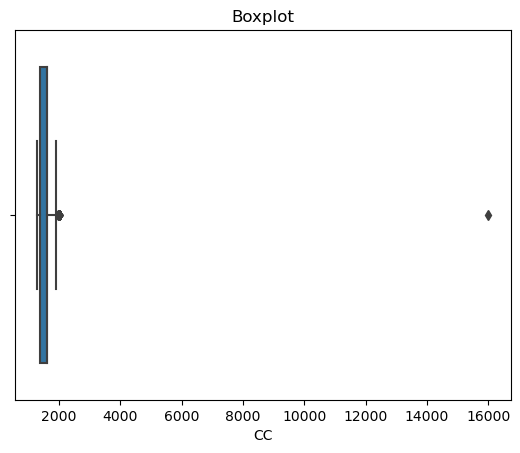

In [10]:
a = input(str('enter column name : '))
sns.boxplot(x=dt[a])
plt.title('Boxplot')
plt.xlabel(a)
plt.show()

In [11]:
dt =dt[dt['CC'] < 15000]

In [27]:
sns.regplot(x = "Age" , y = a , data = dt)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1435 and the array at index 1 has size 1

In [13]:
dt.describe()

,Price,Age,KM,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10725.096864,55.968641,68567.067596,101.496167,0.055052,1566.804878,4.032753,4.0,5.026481,1072.384669
std,3621.726584,18.588504,37497.629827,14.984621,0.228162,187.245640,0.952667,0.0,0.188575,52.582788
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,2000.000000,5.000000,4.0,6.000000,1615.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


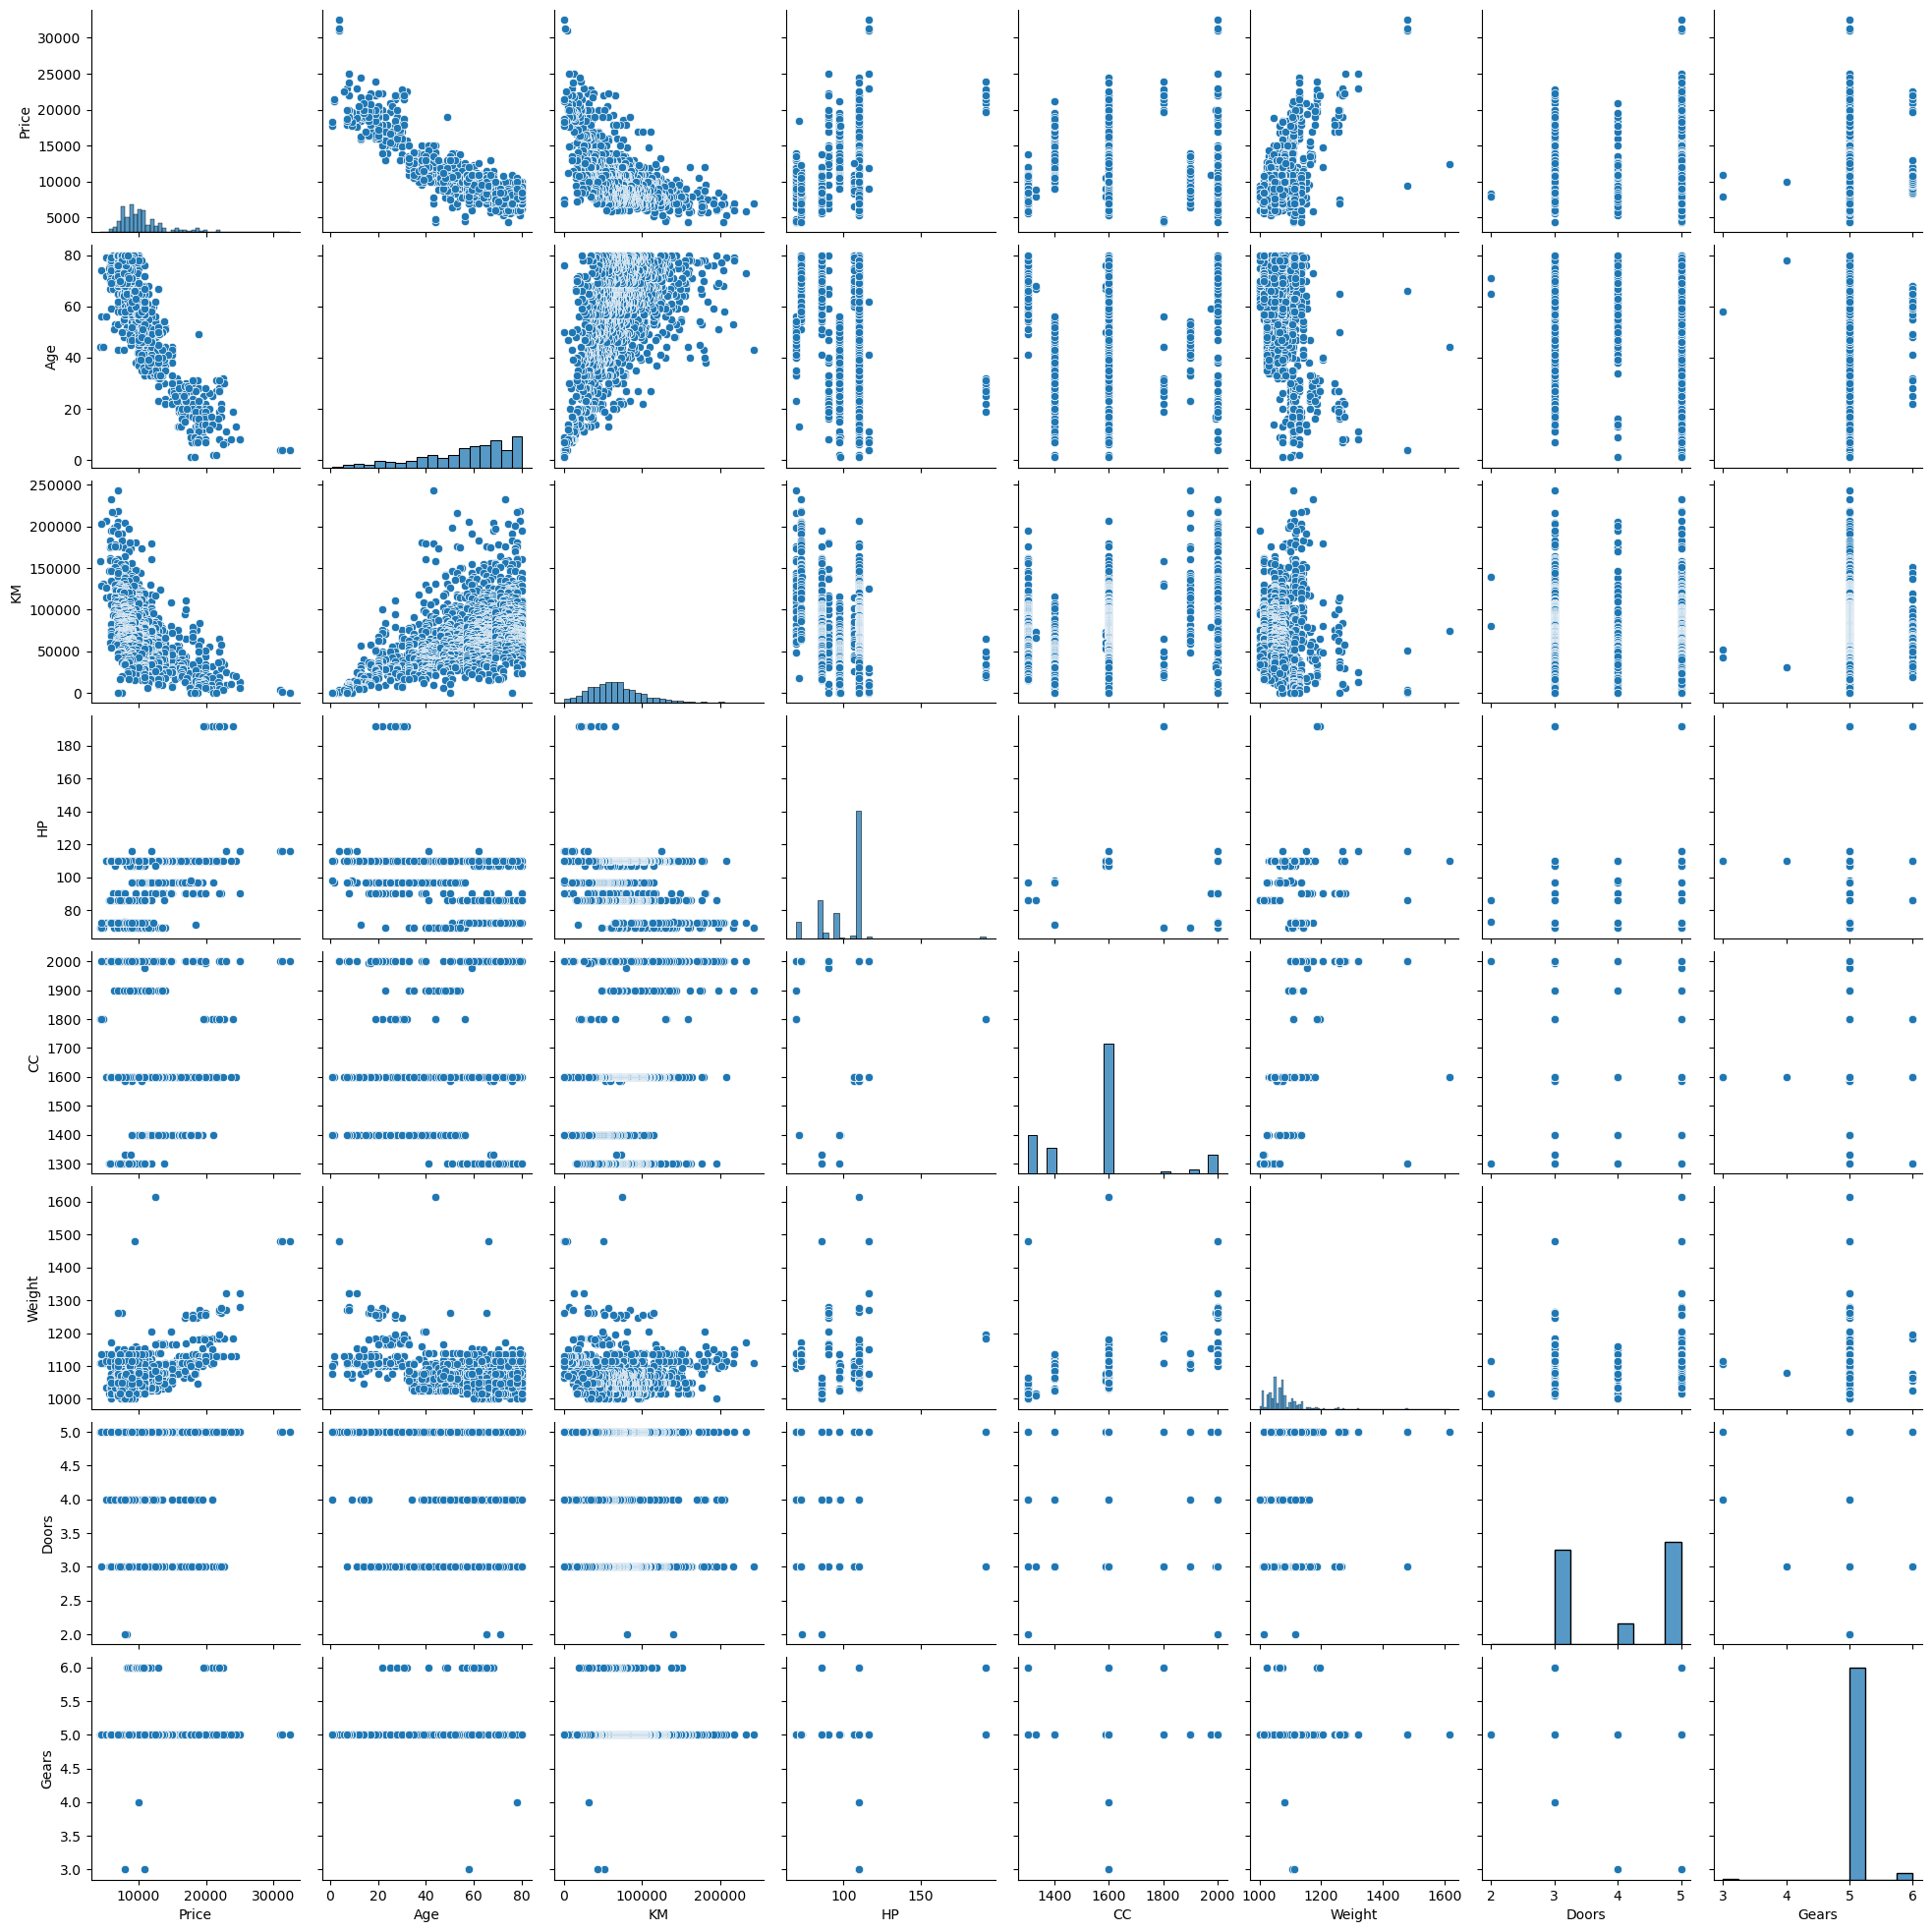

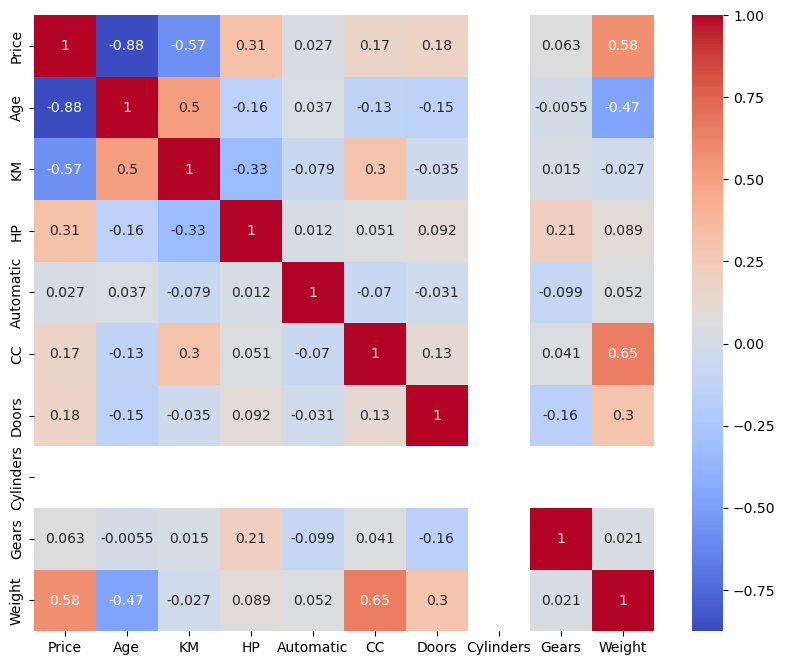

In [14]:
selected_columns = ['Price', 'Age', 'KM', 'HP', 'CC','Weight','Doors','Gears']
sns.pairplot(dt[selected_columns])
plt.show()


# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dt.corr(), annot=True, cmap='coolwarm')
plt.show()


In [15]:
dt[selected_columns].corr()


,Price,Age,KM,HP,CC,Weight,Doors,Gears
Price,1.000000,-0.876377,-0.569268,0.314693,0.165085,0.579851,0.184118,0.063440
Age,-0.876377,1.000000,0.504953,-0.156132,-0.133106,-0.469018,-0.147377,-0.005532
KM,-0.569268,0.504953,1.000000,-0.333258,0.302490,-0.026810,-0.035315,0.014906
HP,0.314693,-0.156132,-0.333258,1.000000,0.050820,0.088945,0.092067,0.209558
CC,0.165085,-0.133106,0.302490,0.050820,1.000000,0.652154,0.126689,0.040712
Weight,0.579851,-0.469018,-0.026810,0.088945,0.652154,1.000000,0.301720,0.020844
Doors,0.184118,-0.147377,-0.035315,0.092067,0.126689,0.301720,1.000000,-0.160101
Gears,0.063440,-0.005532,0.014906,0.209558,0.040712,0.020844,-0.160101,1.000000


In [16]:
allvar = smf.ols("Price~Age+KM+HP+CC+Weight+Doors+Gears" , data = dt).fit().rsquared
a =1/(1-allvar)
price_hp = smf.ols("Price~HP" , data = dt).fit().rsquared
b =1/(1-price_hp)
price_cc = smf.ols("Price~CC" , data = dt).fit().rsquared
c =1/(1-price_cc)
price_wt = smf.ols("Price~Weight" , data = dt).fit().rsquared
d =1/(1-price_wt)
price_wt_age = smf.ols("Price~Weight+Age" , data = dt).fit().rsquared
e =1/(1-price_wt_age)
price_cc_age = smf.ols("Price~CC+Age" , data = dt).fit().rsquared
f =1/(1-price_cc_age)

In [17]:
allvar1 = smf.ols("Price~Age+KM+HP+CC+Weight+Doors+Gears" , data = dt).fit().rsquared_adj
price_hp1 = smf.ols("Price~HP" , data = dt).fit().rsquared_adj
price_cc1 = smf.ols("Price~CC" , data = dt).fit().rsquared_adj 
price_wt1 = smf.ols("Price~Weight" , data = dt).fit().rsquared_adj 
price_wt_age1 = smf.ols("Price~Weight+Age" , data = dt).fit().rsquared_adj 
price_cc_age1 = smf.ols("Price~CC+Age" , data = dt).fit().rsquared_adj

In [18]:
d1 ={'models': ['allvar','price_hp','price_cc','price_wt','price_wt_age','price_cc_age'] , 
     'r_sqd': [allvar,price_hp,price_cc,price_wt,price_wt_age,price_cc_age],
    'Adj.rsquared':[allvar1,price_hp1,price_cc1,price_wt1,price_wt_age1,price_cc_age1],
    'VIF': [a,b,c,d,e,f]}

In [19]:
vif_frame = pd.DataFrame(d1)
vif_frame

,models,r_sqd,Adj.rsquared,VIF
0,allvar,0.865688,0.865030,7.445373
1,price_hp,0.099031,0.098403,1.109917
2,price_cc,0.027253,0.026574,1.028016
3,price_wt,0.336228,0.335764,1.506540
4,price_wt_age,0.804571,0.804298,5.116958
5,price_cc_age,0.770424,0.770103,4.355858


In [20]:
# Split features and target variable
X = dt.drop('Price', axis=1)
y = dt['Price']

In [21]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Build linear regression model
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

# Coefficients
coefficients = pd.DataFrame(model_1.coef_, X.columns, columns=['Coefficient'])
print(coefficients)



            Coefficient
Age       -1.188392e+02
KM        -1.604513e-02
HP         3.446224e+01
Automatic  2.636925e+02
CC        -2.512404e+00
Doors     -6.632488e+01
Cylinders  1.534772e-12
Gears      3.727516e+02
Weight     2.709533e+01


In [29]:
# Intercept
print(f'Intercept: {model_1.intercept_}')

Intercept: -11758.150777297678


In [23]:
# Build Lasso regression model
model_2 = Lasso(alpha=0.1)
model_2.fit(X_train, y_train)


Lasso(alpha=0.1)

In [24]:
# Build Ridge regression model
model_3 = Ridge(alpha=0.1)
model_3.fit(X_train, y_train)


Ridge(alpha=0.1)

In [25]:
# Predict on the test set
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)

# Evaluation metrics
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, r2

# Model 1
mse_1, rmse_1, r2_1 = evaluate_model(y_test, y_pred_1)
print(f'Model 1 - MSE: {mse_1}, RMSE: {rmse_1}, R2: {r2_1}')

# Model 2
mse_2, rmse_2, r2_2 = evaluate_model(y_test, y_pred_2)
print(f'Model 2 - MSE: {mse_2}, RMSE: {rmse_2}, R2: {r2_2}')

# Model 3
mse_3, rmse_3, r2_3 = evaluate_model(y_test, y_pred_3)
print(f'Model 3 - MSE: {mse_3}, RMSE: {rmse_3}, R2: {r2_3}')


Model 1 - MSE: 2159140.745415974, RMSE: 1469.4014922464091, R2: 0.8120882501639265
Model 2 - MSE: 2159363.8668571017, RMSE: 1469.4774128434576, R2: 0.8120688317260515
Model 3 - MSE: 2159227.406541895, RMSE: 1469.430980530183, R2: 0.8120807079766703


In [26]:
# Lasso method
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
mse_lasso, rmse_lasso, r2_lasso = evaluate_model(y_test, lasso_pred)
print(f'Lasso - MSE: {mse_lasso}, RMSE: {rmse_lasso}, R2: {r2_lasso}')

# Ridge method
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
mse_ridge, rmse_ridge, r2_ridge = evaluate_model(y_test, ridge_pred)
print(f'Ridge - MSE: {mse_ridge}, RMSE: {rmse_ridge}, R2: {r2_ridge}')


Lasso - MSE: 2159363.8668571017, RMSE: 1469.4774128434576, R2: 0.8120688317260515
Ridge - MSE: 2159227.406541895, RMSE: 1469.430980530183, R2: 0.8120807079766703


In [30]:
# Determine the best fit model
best_model = min((mse_1, 'Linear Regression'), (mse_2, 'Lasso Regression'), (mse_3, 'Ridge Regression'))
print(f'The best fit model is: {best_model[1]}')

The best fit model is: Linear Regression
